In [43]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [54]:
df = pd.read_csv('../data/nba_all.csv', index_col=0)

In [55]:
len(df)

22804

In [56]:
df.tail()

,DATE,START,VISITOR,PTS,HOME,PTS.1,ATTEND,VISITOR_MP,VISITOR_FG,VISITOR_FGA,...,HOME_AST%,HOME_STL%,HOME_BLK%,HOME_TOV%,HOME_USG%,HOME_ORtg,HOME_DRtg,DAY_OF_WEEK,LABEL,YEAR
22799,2019-02-08,9:30p,Minnesota Timberwolves,117.0,New Orleans Pelicans,122.0,16980.0,240.0,46.0,91.0,...,62.8,10.5,10.0,9.6,100.0,116.7,112.0,5,1,2019
22800,2019-02-08,7:00p,Denver Nuggets,110.0,Philadelphia 76ers,117.0,20627.0,240.0,46.0,94.0,...,59.0,6.9,7.4,15.6,100.0,115.9,108.9,5,1,2019
22801,2019-02-08,9:00p,Golden State Warriors,117.0,Phoenix Suns,107.0,17081.0,240.0,41.0,81.0,...,59.0,11.7,1.9,8.8,100.0,104.1,113.9,5,0,2019
22802,2019-02-08,10:00p,Miami Heat,96.0,Sacramento Kings,102.0,17583.0,240.0,38.0,88.0,...,48.6,10.9,9.1,11.4,100.0,100.9,94.9,5,1,2019
22803,2019-02-08,7:00p,Cleveland Cavaliers,106.0,Washington Wizards,119.0,16682.0,240.0,36.0,96.0,...,76.1,9.8,6.9,13.9,100.0,116.9,104.1,5,1,2019


In [47]:
## Creating a df of a single team:

In [57]:
teams = list(df['HOME'].unique())

In [58]:
teams

['Atlanta Hawks',
 'Chicago Bulls',
 'Dallas Mavericks',
 'Golden State Warriors',
 'Houston Rockets',
 'Brooklyn Nets',
 'New York Knicks',
 'Orlando Magic',
 'Portland Trail Blazers',
 'San Antonio Spurs',
 'Toronto Raptors',
 'Utah Jazz',
 'Vancouver Grizzlies',
 'Boston Celtics',
 'Charlotte Hornets',
 'Cleveland Cavaliers',
 'Los Angeles Lakers',
 'Miami Heat',
 'Philadelphia 76ers',
 'Oklahoma City Thunder',
 'Denver Nuggets',
 'Los Angeles Clippers',
 'Phoenix Suns',
 'Detroit Pistons',
 'Washington Wizards',
 'Indiana Pacers',
 'Milwaukee Bucks',
 'Minnesota Timberwolves',
 'Sacramento Kings',
 'Memphis Grizzlies',
 'New Orleans Pelicans']

In [59]:
team = 'Los Angeles Lakers'

In [60]:
df_team = df[(df['HOME'] == team) | (df['VISITOR'] == team)]

In [61]:
df_team.head()

,DATE,START,VISITOR,PTS,HOME,PTS.1,ATTEND,VISITOR_MP,VISITOR_FG,VISITOR_FGA,...,HOME_AST%,HOME_STL%,HOME_BLK%,HOME_TOV%,HOME_USG%,HOME_ORtg,HOME_DRtg,DAY_OF_WEEK,LABEL,YEAR
8,2000-10-31,10:30p,Los Angeles Lakers,96.0,Portland Trail Blazers,86.0,20270.0,240.0,36.0,63.0,...,52.9,15.1,1.9,9.8,100.0,100.2,111.8,2,0,2001
16,2000-11-01,10:30p,Utah Jazz,97.0,Los Angeles Lakers,92.0,18997.0,240.0,33.0,66.0,...,50.0,5.6,10.5,11.3,100.0,103.3,108.9,3,0,2001
46,2000-11-04,3:30p,Los Angeles Lakers,98.0,Vancouver Grizzlies,89.0,18183.0,240.0,38.0,78.0,...,74.2,6.2,3.0,17.9,100.0,92.2,101.5,6,0,2001
47,2000-11-05,9:30p,Los Angeles Clippers,103.0,Los Angeles Lakers,108.0,18997.0,240.0,40.0,82.0,...,71.8,1.1,10.6,7.6,100.0,113.7,108.4,7,1,2001
55,2000-11-07,8:30p,Los Angeles Lakers,74.0,Houston Rockets,84.0,14473.0,240.0,28.0,67.0,...,62.1,12.8,1.9,19.0,100.0,97.4,85.8,2,1,2001


In [62]:
df_team = df_team.reset_index()

In [63]:
df_team.head()

,index,DATE,START,VISITOR,PTS,HOME,PTS.1,ATTEND,VISITOR_MP,VISITOR_FG,...,HOME_AST%,HOME_STL%,HOME_BLK%,HOME_TOV%,HOME_USG%,HOME_ORtg,HOME_DRtg,DAY_OF_WEEK,LABEL,YEAR
0,8,2000-10-31,10:30p,Los Angeles Lakers,96.0,Portland Trail Blazers,86.0,20270.0,240.0,36.0,...,52.9,15.1,1.9,9.8,100.0,100.2,111.8,2,0,2001
1,16,2000-11-01,10:30p,Utah Jazz,97.0,Los Angeles Lakers,92.0,18997.0,240.0,33.0,...,50.0,5.6,10.5,11.3,100.0,103.3,108.9,3,0,2001
2,46,2000-11-04,3:30p,Los Angeles Lakers,98.0,Vancouver Grizzlies,89.0,18183.0,240.0,38.0,...,74.2,6.2,3.0,17.9,100.0,92.2,101.5,6,0,2001
3,47,2000-11-05,9:30p,Los Angeles Clippers,103.0,Los Angeles Lakers,108.0,18997.0,240.0,40.0,...,71.8,1.1,10.6,7.6,100.0,113.7,108.4,7,1,2001
4,55,2000-11-07,8:30p,Los Angeles Lakers,74.0,Houston Rockets,84.0,14473.0,240.0,28.0,...,62.1,12.8,1.9,19.0,100.0,97.4,85.8,2,1,2001


In [64]:
df_team.columns

Index(['index', 'DATE', 'START', 'VISITOR', 'PTS', 'HOME', 'PTS.1', 'ATTEND',
       'VISITOR_MP', 'VISITOR_FG', 'VISITOR_FGA', 'VISITOR_FG%', 'VISITOR_3P',
       'VISITOR_3PA', 'VISITOR_3P%', 'VISITOR_FT', 'VISITOR_FTA',
       'VISITOR_FT%', 'VISITOR_ORB', 'VISITOR_DRB', 'VISITOR_TRB',
       'VISITOR_AST', 'VISITOR_STL', 'VISITOR_BLK', 'VISITOR_TOV',
       'VISITOR_PF', 'VISITOR_PTS', 'VISITOR_+/-', 'VISITOR_TS%',
       'VISITOR_eFG%', 'VISITOR_3PAr', 'VISITOR_FTr', 'VISITOR_ORB%',
       'VISITOR_DRB%', 'VISITOR_TRB%', 'VISITOR_AST%', 'VISITOR_STL%',
       'VISITOR_BLK%', 'VISITOR_TOV%', 'VISITOR_USG%', 'VISITOR_ORtg',
       'VISITOR_DRtg', 'HOME_MP', 'HOME_FG', 'HOME_FGA', 'HOME_FG%', 'HOME_3P',
       'HOME_3PA', 'HOME_3P%', 'HOME_FT', 'HOME_FTA', 'HOME_FT%', 'HOME_ORB',
       'HOME_DRB', 'HOME_TRB', 'HOME_AST', 'HOME_STL', 'HOME_BLK', 'HOME_TOV',
       'HOME_PF', 'HOME_PTS', 'HOME_+/-', 'HOME_TS%', 'HOME_eFG%', 'HOME_3PAr',
       'HOME_FTr', 'HOME_ORB%', 'HOME_DRB%', 'HO

In [65]:
always_cols = ['DATE', 'START', 'VISITOR', 'HOME', 'ATTEND','DAY_OF_WEEK', 'YEAR', 'LABEL']


home_cols = ['HOME_FG%', 'HOME_3P%',
       'HOME_FT%', 'HOME_ORB', 'HOME_DRB', 'HOME_TRB', 'HOME_AST', 'HOME_STL',
       'HOME_BLK', 'HOME_TOV', 'HOME_PTS', 'HOME_TS%', 'HOME_eFG%',
       'HOME_3PAr', 'HOME_FTr', 'HOME_ORB%', 'HOME_DRB%', 'HOME_TRB%',
       'HOME_AST%', 'HOME_STL%', 'HOME_BLK%', 'HOME_TOV%', 'HOME_ORtg',
       'HOME_DRtg']


visitor_cols = ['VISITOR_FG%',
       'VISITOR_3P%', 'VISITOR_FT%', 'VISITOR_ORB', 'VISITOR_DRB',
       'VISITOR_TRB', 'VISITOR_AST', 'VISITOR_STL', 'VISITOR_BLK',
       'VISITOR_TOV', 'VISITOR_PTS', 'VISITOR_TS%', 'VISITOR_eFG%',
       'VISITOR_3PAr', 'VISITOR_FTr', 'VISITOR_ORB%', 'VISITOR_DRB%',
       'VISITOR_TRB%', 'VISITOR_AST%', 'VISITOR_STL%', 'VISITOR_BLK%',
       'VISITOR_TOV%', 'VISITOR_ORtg', 'VISITOR_DRtg']

In [66]:
colums_team = ['FG%', '3P%',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PTS', 'TS%', 'eFG%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'ORtg',
       'DRtg', 'H_V']

In [67]:
df_t = pd.DataFrame()
h_v_list = []
for i in tqdm(range(len(df_team))):
    if df_team['HOME'][i] == team:
        
        df_t = df_t.append([list(df_team.iloc[i][home_cols].values)])
        h_v_list.append('H')
    if df_team['VISITOR'][i] == team:
        
        df_t = df_t.append([list(df_team.iloc[i][visitor_cols].values)])
        h_v_list.append('V')
    

100%|██████████| 1590/1590 [00:06<00:00, 247.02it/s]


In [68]:
df_t.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.571,0.455,0.633,8.0,31.0,39.0,28.0,5.0,8.0,20.0,...,0.476,29.6,70.5,54.9,77.8,5.8,10.8,20.8,111.8,100.2
0,0.430,0.231,0.618,14.0,25.0,39.0,17.0,5.0,6.0,12.0,...,0.430,31.1,78.1,50.6,50.0,5.6,10.5,11.3,103.3,108.9
0,0.487,0.273,0.594,14.0,31.0,45.0,22.0,13.0,8.0,19.0,...,0.410,32.6,83.8,56.3,57.9,13.5,13.6,17.1,101.5,92.2
0,0.419,0.267,0.722,17.0,29.0,46.0,28.0,1.0,7.0,9.0,...,0.387,34.0,78.4,52.9,71.8,1.1,10.6,7.6,113.7,108.4
0,0.418,0.267,0.609,7.0,26.0,33.0,15.0,9.0,7.0,19.0,...,0.343,18.4,68.4,43.4,53.6,10.4,12.5,19.8,85.8,97.4


In [69]:
df_t.columns[0]

0

In [70]:
# Renaming cols:
for i, col in enumerate(df_t.columns):
    df_t = df_t.rename(columns={col: colums_team[i]})


In [71]:
df_t.reset_index(drop=True, inplace=True)

In [72]:
df_t.head()

,FG%,3P%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,...,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,ORtg,DRtg
0,0.571,0.455,0.633,8.0,31.0,39.0,28.0,5.0,8.0,20.0,...,0.476,29.6,70.5,54.9,77.8,5.8,10.8,20.8,111.8,100.2
1,0.430,0.231,0.618,14.0,25.0,39.0,17.0,5.0,6.0,12.0,...,0.430,31.1,78.1,50.6,50.0,5.6,10.5,11.3,103.3,108.9
2,0.487,0.273,0.594,14.0,31.0,45.0,22.0,13.0,8.0,19.0,...,0.410,32.6,83.8,56.3,57.9,13.5,13.6,17.1,101.5,92.2
3,0.419,0.267,0.722,17.0,29.0,46.0,28.0,1.0,7.0,9.0,...,0.387,34.0,78.4,52.9,71.8,1.1,10.6,7.6,113.7,108.4
4,0.418,0.267,0.609,7.0,26.0,33.0,15.0,9.0,7.0,19.0,...,0.343,18.4,68.4,43.4,53.6,10.4,12.5,19.8,85.8,97.4


In [73]:
df_team.head()

,index,DATE,START,VISITOR,PTS,HOME,PTS.1,ATTEND,VISITOR_MP,VISITOR_FG,...,HOME_AST%,HOME_STL%,HOME_BLK%,HOME_TOV%,HOME_USG%,HOME_ORtg,HOME_DRtg,DAY_OF_WEEK,LABEL,YEAR
0,8,2000-10-31,10:30p,Los Angeles Lakers,96.0,Portland Trail Blazers,86.0,20270.0,240.0,36.0,...,52.9,15.1,1.9,9.8,100.0,100.2,111.8,2,0,2001
1,16,2000-11-01,10:30p,Utah Jazz,97.0,Los Angeles Lakers,92.0,18997.0,240.0,33.0,...,50.0,5.6,10.5,11.3,100.0,103.3,108.9,3,0,2001
2,46,2000-11-04,3:30p,Los Angeles Lakers,98.0,Vancouver Grizzlies,89.0,18183.0,240.0,38.0,...,74.2,6.2,3.0,17.9,100.0,92.2,101.5,6,0,2001
3,47,2000-11-05,9:30p,Los Angeles Clippers,103.0,Los Angeles Lakers,108.0,18997.0,240.0,40.0,...,71.8,1.1,10.6,7.6,100.0,113.7,108.4,7,1,2001
4,55,2000-11-07,8:30p,Los Angeles Lakers,74.0,Houston Rockets,84.0,14473.0,240.0,28.0,...,62.1,12.8,1.9,19.0,100.0,97.4,85.8,2,1,2001


In [74]:
for col in always_cols:
    df_t[col] = df_team[col]

In [75]:
df_t.head()

,FG%,3P%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,...,ORtg,DRtg,DATE,START,VISITOR,HOME,ATTEND,DAY_OF_WEEK,YEAR,LABEL
0,0.571,0.455,0.633,8.0,31.0,39.0,28.0,5.0,8.0,20.0,...,111.8,100.2,2000-10-31,10:30p,Los Angeles Lakers,Portland Trail Blazers,20270.0,2,2001,0
1,0.430,0.231,0.618,14.0,25.0,39.0,17.0,5.0,6.0,12.0,...,103.3,108.9,2000-11-01,10:30p,Utah Jazz,Los Angeles Lakers,18997.0,3,2001,0
2,0.487,0.273,0.594,14.0,31.0,45.0,22.0,13.0,8.0,19.0,...,101.5,92.2,2000-11-04,3:30p,Los Angeles Lakers,Vancouver Grizzlies,18183.0,6,2001,0
3,0.419,0.267,0.722,17.0,29.0,46.0,28.0,1.0,7.0,9.0,...,113.7,108.4,2000-11-05,9:30p,Los Angeles Clippers,Los Angeles Lakers,18997.0,7,2001,1
4,0.418,0.267,0.609,7.0,26.0,33.0,15.0,9.0,7.0,19.0,...,85.8,97.4,2000-11-07,8:30p,Los Angeles Lakers,Houston Rockets,14473.0,2,2001,1


In [76]:
df_t['H_V'] = h_v_list

In [77]:
df_t.head()

,FG%,3P%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,...,DRtg,DATE,START,VISITOR,HOME,ATTEND,DAY_OF_WEEK,YEAR,LABEL,H_V
0,0.571,0.455,0.633,8.0,31.0,39.0,28.0,5.0,8.0,20.0,...,100.2,2000-10-31,10:30p,Los Angeles Lakers,Portland Trail Blazers,20270.0,2,2001,0,V
1,0.430,0.231,0.618,14.0,25.0,39.0,17.0,5.0,6.0,12.0,...,108.9,2000-11-01,10:30p,Utah Jazz,Los Angeles Lakers,18997.0,3,2001,0,H
2,0.487,0.273,0.594,14.0,31.0,45.0,22.0,13.0,8.0,19.0,...,92.2,2000-11-04,3:30p,Los Angeles Lakers,Vancouver Grizzlies,18183.0,6,2001,0,V
3,0.419,0.267,0.722,17.0,29.0,46.0,28.0,1.0,7.0,9.0,...,108.4,2000-11-05,9:30p,Los Angeles Clippers,Los Angeles Lakers,18997.0,7,2001,1,H
4,0.418,0.267,0.609,7.0,26.0,33.0,15.0,9.0,7.0,19.0,...,97.4,2000-11-07,8:30p,Los Angeles Lakers,Houston Rockets,14473.0,2,2001,1,V


In [78]:
df_t.columns

Index(['FG%', '3P%', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PTS', 'TS%', 'eFG%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'ORtg', 'DRtg', 'DATE', 'START', 'VISITOR',
       'HOME', 'ATTEND', 'DAY_OF_WEEK', 'YEAR', 'LABEL', 'H_V'],
      dtype='object')

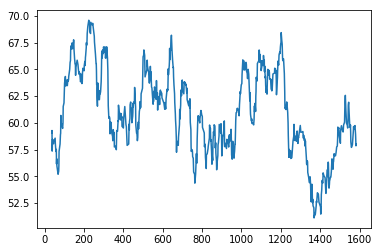

In [79]:
df_t[df_t['H_V'] == 'H']['AST%'].rolling(20).mean().plot()

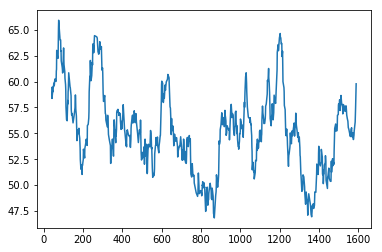

In [80]:
df_t[df_t['H_V'] == 'V']['AST%'].rolling(20).mean().plot()

In [81]:
## Creating a new column if the team won or not:

def map_win(x):
    #print(x)
    if x['H_V'] == 'H' and x['LABEL'] == 1:
        
        return 1
    
    elif x['H_V'] == 'V' and x['LABEL'] == 0:
        return 1
    
    else:
        return 0
    

In [82]:
df_t['WIN'] = df_t.apply(map_win, axis=1)

In [83]:
df_t.tail()

,FG%,3P%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,...,DATE,START,VISITOR,HOME,ATTEND,DAY_OF_WEEK,YEAR,LABEL,H_V,WIN
1585,0.438,0.259,0.588,13.0,36.0,49.0,23.0,5.0,4.0,15.0,...,2019-02-02,8:30p,Los Angeles Lakers,Golden State Warriors,19596.0,6,2019,1,V,0
1586,0.467,0.190,0.769,3.0,31.0,34.0,25.0,5.0,3.0,19.0,...,2019-02-05,7:00p,Los Angeles Lakers,Indiana Pacers,17265.0,2,2019,1,V,0
1587,0.515,0.537,0.389,10.0,33.0,43.0,35.0,5.0,6.0,8.0,...,2019-02-07,8:00p,Los Angeles Lakers,Boston Celtics,18624.0,4,2019,0,V,1
1588,0.438,0.259,0.588,13.0,36.0,49.0,23.0,5.0,4.0,15.0,...,2019-02-02,8:30p,Los Angeles Lakers,Golden State Warriors,19596.0,6,2019,1,V,0
1589,0.515,0.537,0.389,10.0,33.0,43.0,35.0,5.0,6.0,8.0,...,2019-02-07,8:00p,Los Angeles Lakers,Boston Celtics,18624.0,4,2019,0,V,1


In [84]:
df_t.columns

Index(['FG%', '3P%', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PTS', 'TS%', 'eFG%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'ORtg', 'DRtg', 'DATE', 'START', 'VISITOR',
       'HOME', 'ATTEND', 'DAY_OF_WEEK', 'YEAR', 'LABEL', 'H_V', 'WIN'],
      dtype='object')

In [85]:
df_t['NRtg'] = df_t['ORtg'] - df_t['DRtg']

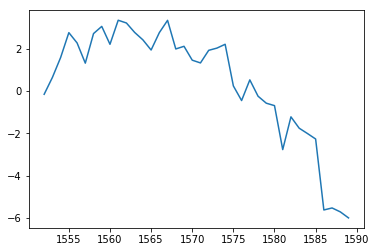

In [86]:
df_t[df_t['YEAR'] == 2019]['NRtg'].rolling(20).mean().plot()

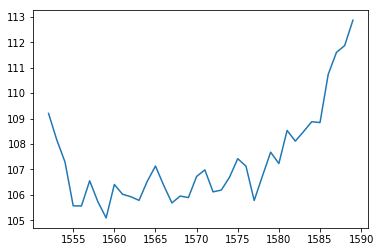

In [87]:
df_t[df_t['YEAR'] == 2019]['DRtg'].rolling(20).mean().plot()

In [89]:
df_t.set_index('DATE', inplace=True)

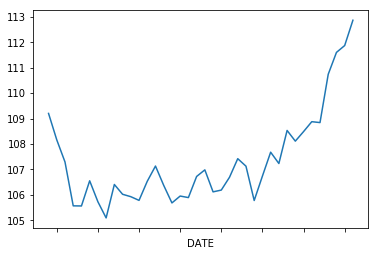

In [90]:
df_t[df_t['YEAR'] == 2019]['DRtg'].rolling(20).mean().plot()

In [91]:
df_t.tail()

,FG%,3P%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,...,START,VISITOR,HOME,ATTEND,DAY_OF_WEEK,YEAR,LABEL,H_V,WIN,NRtg
DATE,,,,,,,,,,,,,,,,,,,,,
2019-02-02,0.438,0.259,0.588,13.0,36.0,49.0,23.0,5.0,4.0,15.0,...,8:30p,Los Angeles Lakers,Golden State Warriors,19596.0,6,2019,1,V,0,-13.8
2019-02-05,0.467,0.190,0.769,3.0,31.0,34.0,25.0,5.0,3.0,19.0,...,7:00p,Los Angeles Lakers,Indiana Pacers,17265.0,2,2019,1,V,0,-41.9
2019-02-07,0.515,0.537,0.389,10.0,33.0,43.0,35.0,5.0,6.0,8.0,...,8:00p,Los Angeles Lakers,Boston Celtics,18624.0,4,2019,0,V,1,1.0
2019-02-02,0.438,0.259,0.588,13.0,36.0,49.0,23.0,5.0,4.0,15.0,...,8:30p,Los Angeles Lakers,Golden State Warriors,19596.0,6,2019,1,V,0,-13.8
2019-02-07,0.515,0.537,0.389,10.0,33.0,43.0,35.0,5.0,6.0,8.0,...,8:00p,Los Angeles Lakers,Boston Celtics,18624.0,4,2019,0,V,1,1.0


In [94]:
df_t.reset_index(inplace=True)

In [95]:
df_t.drop_duplicates(subset=['DATE', 'HOME', 'VISITOR']).tail()

,DATE,FG%,3P%,FT%,ORB,DRB,TRB,AST,STL,BLK,...,START,VISITOR,HOME,ATTEND,DAY_OF_WEEK,YEAR,LABEL,H_V,WIN,NRtg
1583,2019-01-29,0.467,0.304,0.750,14.0,35.0,49.0,26.0,7.0,4.0,...,10:30p,Philadelphia 76ers,Los Angeles Lakers,18997.0,2,2019,0,H,0,-15.5
1584,2019-01-31,0.457,0.423,0.800,7.0,49.0,56.0,28.0,7.0,4.0,...,10:30p,Los Angeles Lakers,Los Angeles Clippers,19068.0,4,2019,0,V,1,2.7
1585,2019-02-02,0.438,0.259,0.588,13.0,36.0,49.0,23.0,5.0,4.0,...,8:30p,Los Angeles Lakers,Golden State Warriors,19596.0,6,2019,1,V,0,-13.8
1586,2019-02-05,0.467,0.190,0.769,3.0,31.0,34.0,25.0,5.0,3.0,...,7:00p,Los Angeles Lakers,Indiana Pacers,17265.0,2,2019,1,V,0,-41.9
1587,2019-02-07,0.515,0.537,0.389,10.0,33.0,43.0,35.0,5.0,6.0,...,8:00p,Los Angeles Lakers,Boston Celtics,18624.0,4,2019,0,V,1,1.0
